<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/normal_arctan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regarding the one of the noise models in cryojax, and it’s equivalent to pankhurst: gaussian white noise, after an arctan transformation to get angle, is uniform. so they can easily be made equivalent (sample gaussian white noise, scale power) == (deterministically evaluate power, sample uniform phases)

[1] Parkhurst, J. M., Cavalleri, A., Dumoux, M., Basham, M., Clare, D., Siebert, C. A., … Essex, J. W. (2024). Computational models of amorphous ice for accurate simulation of cryo-EM images of biological samples. Ultramicroscopy, 256(October 2023), 113882. http://doi.org/10.1016/j.ultramic.2023.113882
[2] https://github.com/mjo22/cryojax

In [7]:
import torch
import torch.distributions as dist
import numpy as np
import pandas as pd

In [14]:
n_samples = 10000
standard_normal = dist.Normal(0,1)
white_noise = standard_normal.sample((n_samples,)) + 1j*standard_normal.sample((n_samples,))

In [15]:
atan = torch.arctan2(white_noise.imag,white_noise.real)

<Axes: ylabel='Frequency'>

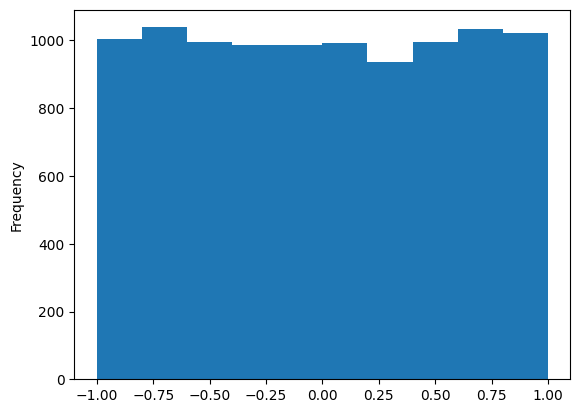

In [17]:
pd.Series(atan/torch.pi).plot.hist()